In [94]:
import warnings;
warnings.simplefilter("ignore")

In [95]:
# I did not manage to install pystan & fbprophet with pip install. I had to change to Anaconda environment. 
# If you have a problem with pip install you need to do the same. For possible production later, we need to find a workaround.

import pandas as pd
import fbprophet as Prophet

In [96]:
import os
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
os.getcwd()

'C:\\Users\\hauke\\Documents\\LeWagon Kurs\\Project'

In [97]:
local_path_target = 'df_deutschland.csv'

local_path_feature = "wind_hourly_clean.csv"

data_target = pd.read_csv(local_path_target)
data_feature = pd.read_csv(local_path_feature, index_col=0)

data_target['Date'] = pd.to_datetime(data_target.Date)

In [98]:
generation_df = data_target.groupby(by=data_target['Date']).sum()
generation_df.head()

,Wind offshore[MWh],Wind onshore[MWh],Photovoltaics[MWh]
Date,,,
2015-01-01 00:00:00,517.0,8129.0,0.0
2015-01-01 01:00:00,516.0,8300.0,0.0
2015-01-01 02:00:00,514.0,8544.0,0.0
2015-01-01 03:00:00,519.0,8552.0,0.0
2015-01-01 04:00:00,522.0,8646.0,0.0


In [99]:
wind_df = generation_df[['Wind offshore[MWh]','Wind onshore[MWh]']].sum(axis=1)
wind_df.head(24)

Date
2015-01-01 00:00:00     8646.0
2015-01-01 01:00:00     8816.0
2015-01-01 02:00:00     9058.0
2015-01-01 03:00:00     9071.0
2015-01-01 04:00:00     9168.0
2015-01-01 05:00:00     9239.0
2015-01-01 06:00:00     9692.0
2015-01-01 07:00:00    10334.0
2015-01-01 08:00:00    10210.0
2015-01-01 09:00:00    10032.0
2015-01-01 10:00:00    10553.0
2015-01-01 11:00:00    11389.0
2015-01-01 12:00:00    12104.0
2015-01-01 13:00:00    12506.0
2015-01-01 14:00:00    11923.0
2015-01-01 15:00:00    11853.0
2015-01-01 16:00:00    13584.0
2015-01-01 17:00:00    15439.0
2015-01-01 18:00:00    16869.0
2015-01-01 19:00:00    18010.0
2015-01-01 20:00:00    19187.0
2015-01-01 21:00:00    20356.0
2015-01-01 22:00:00    21239.0
2015-01-01 23:00:00    22086.0
dtype: float64

In [100]:
data_feature.index = pd.to_datetime(data_feature.index)
data_feature.head()

,90,125,161,164,183,197,198,232,282,298,...,15000,15044,15120,15122,15189,15200,15207,15214,15444,1001
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,2.1,0.7,0.9,5.1,11.3,3.2,1.6,1.1,0.7,7.0,...,3.9,0.8,4.9,3.2,4.4,3.0,0.5,1.2,1.0,2.2
2015-01-01 01:00:00,2.7,0.3,0.8,4.9,13.0,3.2,2.6,1.5,0.9,7.4,...,3.4,0.7,5.3,2.6,6.0,2.8,0.8,1.1,1.0,2.5
2015-01-01 02:00:00,2.5,0.8,1.3,3.9,12.8,3.2,3.2,1.7,0.9,7.1,...,3.8,1.3,4.8,2.3,5.7,3.1,0.5,1.8,1.2,2.6
2015-01-01 03:00:00,2.0,0.7,1.4,3.7,12.4,3.2,3.5,1.5,0.6,6.9,...,4.2,1.1,4.2,2.5,5.4,3.2,0.7,1.1,1.0,2.8
2015-01-01 04:00:00,1.1,0.9,1.7,4.2,12.2,3.2,3.4,1.7,1.0,6.0,...,4.4,0.9,4.1,1.8,6.1,3.6,0.8,0.9,1.4,2.8


In [101]:
data_feat_mean = data_feature.mean(axis=1)
data_feat_mean_log = np.log(data_feature.mean(axis=1))

### Splitting into train & test

In [102]:
# Wind speed Feature
exog_1 = data_feat_mean.loc[:'2016-01-15 00:00:00']
#exog_1_test = data_feat_mean.loc['2016-01-01 00:00:00':'2016-03-01 00:00:00']
#exog_test_2w = data_feat_mean.loc['2016-01-01 00:00:00':'2016-01-15 00:00:00']

In [258]:
exog_1_test = data_feat_mean.loc['2016-01-15 01:00:00':"2016-01-29 01:00:00"]

In [260]:
exog_1_test = pd.DataFrame(exog_1_test)

In [269]:
exog_1_test.rename(columns = {0:"Name"}, inplace=True)

In [270]:
exog_1_test

,Name
Date,
2016-01-15 01:00:00,4.571923
2016-01-15 02:00:00,4.654231
2016-01-15 03:00:00,4.680769
2016-01-15 04:00:00,4.750769
2016-01-15 05:00:00,4.815769
...,...
2016-01-28 21:00:00,3.370385
2016-01-28 22:00:00,3.481154
2016-01-28 23:00:00,3.559231


In [302]:
# Energy generation target data
wind_df_train = wind_df.loc[:dt.date(2016,1,15)]
wind_df_test = wind_df.loc[dt.date(2016,1,15):dt.date(2016,1,29)]
#wind_df_test_2w = wind_df.loc[dt.date(2016,1,1):dt.date(2016,1,15)]

In [305]:
wind_df_test

Date
2016-01-15 00:00:00     9662.0
2016-01-15 01:00:00     9739.0
2016-01-15 02:00:00     9646.0
2016-01-15 03:00:00     9482.0
2016-01-15 04:00:00     9578.0
                        ...   
2016-01-28 20:00:00    15164.0
2016-01-28 21:00:00    16141.0
2016-01-28 22:00:00    16165.0
2016-01-28 23:00:00    16339.0
2016-01-29 00:00:00    16846.0
Length: 337, dtype: float64

In [104]:
# Building one Train DataFrame out of the target and Feature
df = pd.concat([wind_df_train, exog_1], axis=1)

In [105]:
# And DF for the test data
#df_test = pd.concat([wind_df_test, exog_1_test], axis=1)
#df_test2w = pd.concat([wind_df_test_2w, exog_test_2w], axis=1)

In [106]:
df.rename(columns={0:"y", 1:"X"}, inplace = True)

In [107]:
df["ds"] = df.index

In [161]:
df["index"] = range(len(df))

In [162]:
df.set_index("index",drop=True, inplace=True)

In [170]:
df.head()

,y,X,ds
index,,,
0,8646.0,3.320000,2015-01-01 00:00:00
1,8816.0,3.306154,2015-01-01 01:00:00
2,9058.0,3.313077,2015-01-01 02:00:00
3,9071.0,3.280000,2015-01-01 03:00:00
4,9168.0,3.300769,2015-01-01 04:00:00


In [164]:
1/24


0.041666666666666664

### The FB Prophet model

In [165]:
# fitting the model
m = Prophet.Prophet(changepoint_prior_scale = (1/24), daily_seasonality = True)
m.add_regressor('X')
model = m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [253]:
# predicting 2 Weeks
future = model.make_future_dataframe(periods=(14*24+1), freq='H')
future["X"] = df["X"]

In [288]:
future["X"][9097:9434] = exog_1_test["Name"]

In [290]:
future["X"][9097:9434]

9097    4.571923
9098    4.654231
9099    4.680769
9100    4.750769
9101    4.815769
          ...   
9429    3.370385
9430    3.481154
9431    3.559231
9432    3.674231
9433    3.856538
Name: X, Length: 337, dtype: float64

In [291]:
future

,ds,X
0,2015-01-01 00:00:00,3.320000
1,2015-01-01 01:00:00,3.306154
2,2015-01-01 02:00:00,3.313077
3,2015-01-01 03:00:00,3.280000
4,2015-01-01 04:00:00,3.300769
...,...,...
9429,2016-01-28 21:00:00,3.370385
9430,2016-01-28 22:00:00,3.481154
9431,2016-01-28 23:00:00,3.559231
9432,2016-01-29 00:00:00,3.674231


In [313]:
y_pred = model.predict(future)

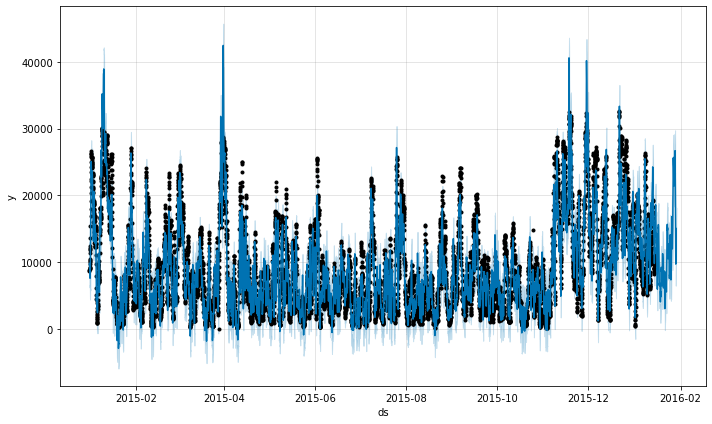

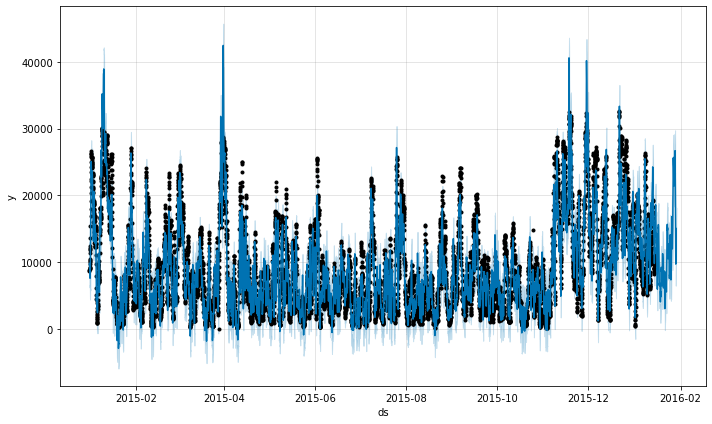

In [314]:
model.plot(y_pred)

In [348]:
wind_df_testP = pd.DataFrame(wind_df_test)
wind_df_test.reset_index(inplace=True)
wind_df_test

,index,Date,0
0,0,2016-01-15 00:00:00,9662.0
1,1,2016-01-15 01:00:00,9739.0
2,2,2016-01-15 02:00:00,9646.0
3,3,2016-01-15 03:00:00,9482.0
4,4,2016-01-15 04:00:00,9578.0
...,...,...,...
332,332,2016-01-28 20:00:00,15164.0
333,333,2016-01-28 21:00:00,16141.0
334,334,2016-01-28 22:00:00,16165.0
335,335,2016-01-28 23:00:00,16339.0


In [352]:
y_pred2wP = pd.DataFrame(y_pred2w)
y_pred2wP.set_index(wind_df_test.index)
y_pred2w.reset_index(inplace=True)
y_pred2w

,level_0,index,yhat
0,0,9097,17807.390399
1,1,9098,18041.447260
2,2,9099,18090.307364
3,3,9100,18389.213318
4,4,9101,18598.237045
...,...,...,...
332,332,9429,12811.976474
333,333,9430,13421.994425
334,334,9431,13840.145871
335,335,9432,14343.642419


<function matplotlib.pyplot.show(close=None, block=None)>

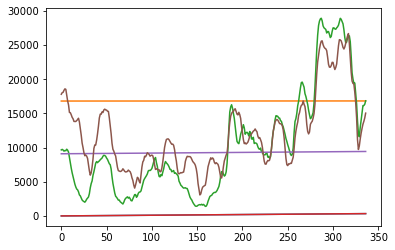

In [353]:
plt.plot(wind_df_test)
plt.plot(y_pred2w)
plt.show

In [315]:
def plot_forecast(fc, train, test, upper=None, lower=None):
    is_confidence_int = isinstance(upper, np.ndarray) and isinstance(lower, np.ndarray)
    # Prepare plot series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(upper, index=test.index) if is_confidence_int else None
    upper_series = pd.Series(lower, index=test.index) if is_confidence_int else None

    # Plot
    plt.figure(figsize=(10,4), dpi=100)
    plt.plot(train, label='training', color='black')
    plt.plot(test, label='actual', color='black', ls='--')
    plt.plot(fc_series, label='forecast', color='orange')
    if is_confidence_int:
        plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8);

In [316]:
y_pred2w = y_pred["yhat"].loc[len(y_pred)-wind_df_test.shape[0]:9433  ]

In [317]:
y_pred2w.shape

(337,)

In [318]:
wind_df_test.shape

(337,)

In [319]:
y_pred2w

9097    17807.390399
9098    18041.447260
9099    18090.307364
9100    18389.213318
9101    18598.237045
            ...     
9429    12811.976474
9430    13421.994425
9431    13840.145871
9432    14343.642419
9433    15040.637877
Name: yhat, Length: 337, dtype: float64

In [320]:
plot_forecast(y_pred2w.set_index(wind_df_test.index), wind_df_train, wind_df_test)

AttributeError: 'Series' object has no attribute 'set_index'

In [321]:
def mae(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.sum(np.abs(y_true-y_pred))/(len(y_true))

def mse(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean((y_true-y_pred)**2)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [322]:
prophet_mape = mean_absolute_percentage_error(wind_df_test, y_pred2w)
prophet_mape

70.27207876156521